<a href="https://colab.research.google.com/github/anilaksu/AI-and-Data-Science-Codes/blob/Time-Series-Analysis/Predict_Stock_Prices_using_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Udemy Data Science Project: Predict Stock Prices using Time Series Analysis**


Anil Aksu

Personal e-mail: aaa293@cornell.edu


## Notebook Organization:
- **Data Preparation for Time Series Forecasting**
- **Intuition behind ARIMA**
- **Applying Auto-ARIMA**
- **Evaluating Time Series Model**

  






#1.**Data Preparation for Time Series Forecasting**





In [1]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/Data Science Projects/Stock_Price

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Data Science Projects/Stock_Price


In [19]:
# Here we install required libraries for ARIMA Model
!python3 -V
!which pip3
!pip3 install pmdarima --upgrade --no-cache-dir

Python 3.10.12
/usr/local/bin/pip3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.3 MB/s eta 0:00:00


In [128]:
# Relevant libraries
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
# Import Stock Price Data
df = pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<Axes: xlabel='Date'>

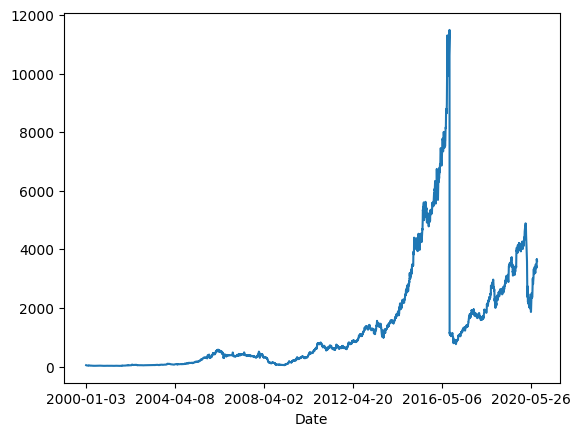

In [88]:
df.set_index('Date', inplace = True)
df['VWAP'].plot()

In [5]:
df.shape

(5070, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace = True)
df.shape

(2291, 14)

In [89]:
data = df.copy()
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [90]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [91]:
# Here we define features we will use for lagged
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [92]:
for feature in lag_features:
  data[feature+'_rolling_mean_3'] = data[feature].rolling(window = window1).mean()
  data[feature+'_rolling_mean_7'] = data[feature].rolling(window = window2).mean()

In [93]:
for feature in lag_features:
  data[feature+'_rolling_std_3'] = data[feature].rolling(window = window1).std()
  data[feature+'_rolling_std_7'] = data[feature].rolling(window = window2).std()

In [94]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,...,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,NaN,NaN


In [95]:
data.dropna(inplace = True)

In [96]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [97]:
ind_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7']

In [119]:
df_train = data[0:1800]
df_test = data[1800:]

In [99]:
df_train.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971


In [100]:
df_test.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,44.330125,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.662632,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,23.795710,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,23.275363,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,28.146507,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,10189.437390,32916.577887


##2.Intuition behind ARIMA

ARIMA = AR + I + MA

*   AR: Auto Regresive (p) (PACF: Partial Auto Correlation Factor)
*   I: Integrating     (d) (Differencing)
*   MA: Moving Average (q) (ACF: Auto Correlation Factor)

Most import aspect of ARIMA is computation of p,d,q




##2.1 Intuition behind Moving Average (MA)

**Auto Correlation Factor (ACF)**:

\begin{equation}
x_i = λx_{i-q} + ɛ
\end{equation}
where $q$ is Auto Correlation Factor and $ɛ$ is error. Whenever the correlation between $x_i$ and $x_{i-q}$ drops below a certain threshold, we choose that value as our $q$ value.

##2.2 Intuition behind AR model

**Partial Auto Correlation Factor (PACF):** Minimize the correlation with data.

Check with Partial Auto Correlation Plot and pick the value that drops below the threshold




##2.3 Intuition behind Integrating

Differencing is basically shifting the data and creates a lagging to create the predictive model. It is typically d = 1, 2, it is 3 or 4.

#3 Applying Auto ARIMA

It uses AIC as metric and minimizes it

In [101]:
# Here we train our auto arima model for VWAP data on indice features
model = auto_arima(y = df_train['VWAP'], X = df_train[ind_features], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.536, Time=5.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.225, Time=3.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.348, Time=2.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.320, Time=3.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.234, Time=4.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 20.672 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [102]:
# Fit the model to the data
model.fit(df_train['VWAP'], df_train[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [122]:
# Predict with the model
y_preds = model.predict(n_periods=len(df_test), X = df_test[ind_features]).tolist()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [123]:
# Let's add it to our test data table
df_test['VWAP_Forecast'] = y_preds

<ipython-input-123-63ee927a9d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['VWAP_Forecast'] = y_preds


<Axes: xlabel='Date'>

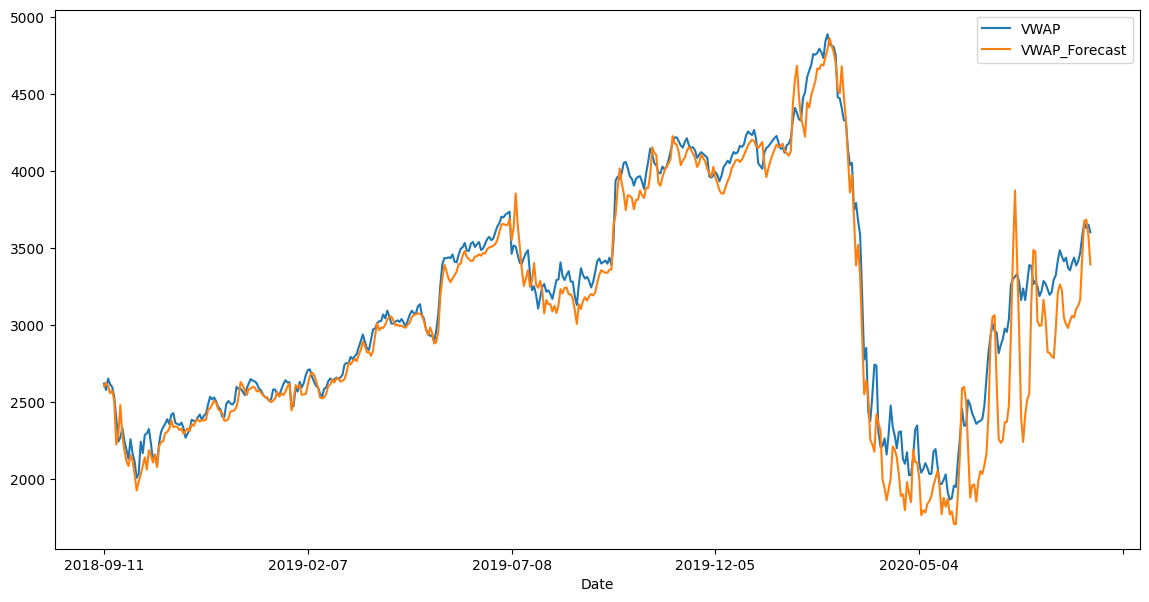

In [127]:
# Let's plot and compare our prediction
df_test[['VWAP','VWAP_Forecast']].plot(figsize = (14,7))

#4.Evaluating Time Series Model


In [129]:
# Let's check the accuracy of our model
np.sqrt(mean_squared_error(df_test['VWAP'], df_test['VWAP_Forecast']))

187.75265925160647

In [130]:
np.sqrt(mean_absolute_error(df_test['VWAP'], df_test['VWAP_Forecast']))

11.164054948383745